In [30]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings

### Reading the Dataset from the Location


In [31]:
dataset=pd.read_csv('data/dataset.csv')
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [32]:
dataset.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

 Dataset has no NULL values, so no Imputation is required

### **Dividing Data Set into Target and Training Datasets**

In [33]:
X=dataset.drop(columns=['Calories','User_ID'])
targeted=dataset['Calories']
targeted.head()


0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

**Creating a Column Transformer and Fitting it to Input Dataset**

In [34]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = ['Gender']

Scaler_transformer = StandardScaler()
Encoder_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHoTEncoder", Encoder_transformer,cat_features),
         ("StandardScaler", Scaler_transformer,num_features),        
    ]
)


In [35]:
X=preprocessor.fit_transform(X)
X.shape

(15000, 8)

*Splitting into Training and Testing Datasets ,with 8:2 ratio*

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,targeted,test_size=0.2,random_state=33)
X_train.shape, X_test.shape

((12000, 8), (3000, 8))

Function to Calculate performance metrices for a list of Models

In [37]:
def metrics_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

## Training and Fitting a variety of models in the Input Data

In [38]:

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(), 
}
model_list = []
r2_list =[]

for name,model_applied in models.items():
    model_applied.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model_applied.predict(X_train)
    y_test_pred = model_applied.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = metrics_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = metrics_model(y_test, y_test_pred)

    
    print(name)
    model_list.append(name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-x-x--x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-')
    
    print('Model performance for Test set')
    print("a) Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("b) Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("c) R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('_'*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 11.3966
- Mean Absolute Error: 8.4206
- R2 Score: 0.9669
-x-x--x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-
Model performance for Test set
a) Root Mean Squared Error: 10.9661
b) Mean Absolute Error: 8.1963
c) R2 Score: 0.9685
___________________________________


Lasso
Model performance for Training set
- Root Mean Squared Error: 12.3705
- Mean Absolute Error: 9.1044
- R2 Score: 0.9610
-x-x--x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-
Model performance for Test set
a) Root Mean Squared Error: 11.8802
b) Mean Absolute Error: 8.8830
c) R2 Score: 0.9630
___________________________________


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
-x-x--x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-
Model performance for Test set
a) Root Mean Squared Error: 5.0072
b) Mean Absolute Error: 3.2680
c) R2 Score: 0.9934
___________________________________


Ridge
Model performanc

**Plotting each model against its corresponding R² score**

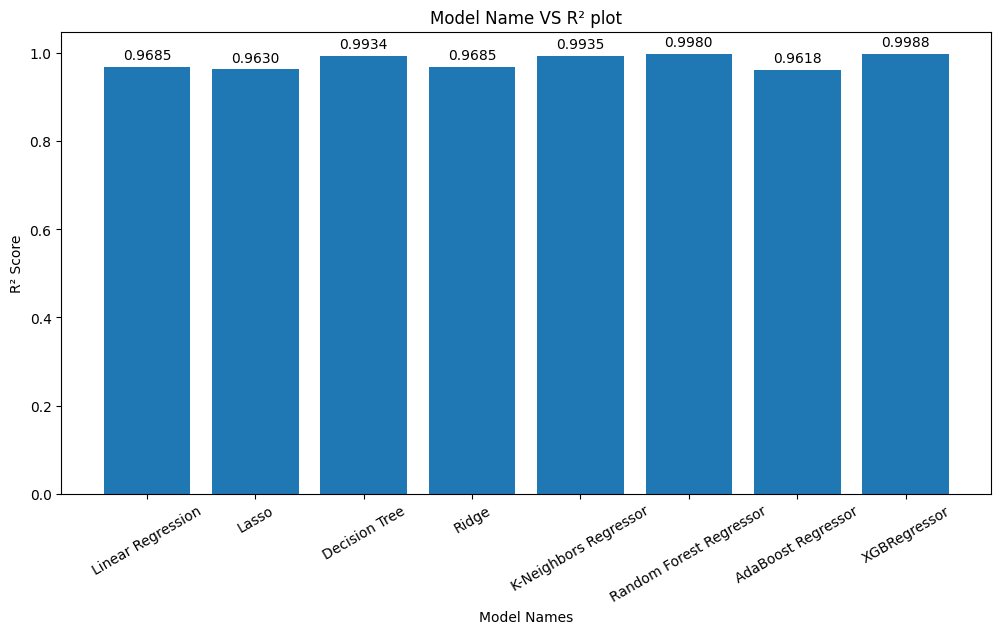

In [39]:
plt.figure(figsize=(12,6))
bars=plt.bar(model_list,r2_list)
plt.title("Model Name VS R² plot")
plt.ylabel("R² Score")
plt.xlabel("Model Names")
plt.xticks(rotation=30)
for bar, r2_scores in zip(bars, r2_list):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height() + 0.01, f'{r2_scores:.4f}', ha='center', va='bottom', fontsize=10)

**Creating a Dataframe to show Tabular Representation of Each model Against their R² score**

In [40]:
resultdf=pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R² score'])
resultdf=resultdf.sort_values(by=["R² score"],ascending=False)
resultdf

,Model Name,R² score
7,XGBRegressor,0.998804
5,Random Forest Regressor,0.998047
4,K-Neighbors Regressor,0.993544
2,Decision Tree,0.993424
0,Linear Regression,0.968457
3,Ridge,0.968456
1,Lasso,0.962979
6,AdaBoost Regressor,0.961806


**Clearly , The R² score for XGB Regressor comes out to be the best Fit for the Model, with highest score of 0.998804**



### Plotting Predicted and True Values for XGB Regressor on this Dataset

In [41]:
XGB=XGBRegressor()
XGB=XGB.fit(X_train,y_train)
XGB_XTest_pred=XGB.predict(X_test)
XGB_XTest_pred.shape


(3000,)

C:\Users\Sushant\AppData\Local\Temp\ipykernel_11456\1749153637.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(XGB_XTest_pred - y_test, shade=True,ax=ax[1])


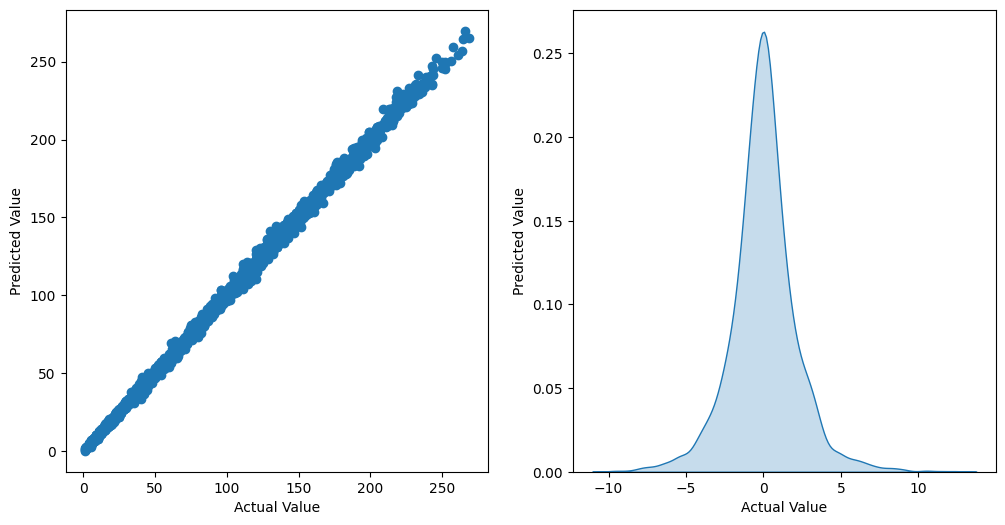

In [42]:

fig,ax=plt.subplots(1,2,figsize=(12,6))


ax[0].scatter(y_test,XGB_XTest_pred)
ax[0].set_xlabel("Actual Value")
ax[0].set_ylabel("Predicted Value")

sns.kdeplot(XGB_XTest_pred - y_test, shade=True,ax=ax[1])
ax[1].set_xlabel("Actual Value")
ax[1].set_ylabel("Predicted Value")
plt.show()


### **Displaying Performance Metrices for XGB Regressor**

In [43]:
s=y_test
z=XGB_XTest_pred    
XGBmae = mean_absolute_error(s,z)
XGBmse = mean_squared_error(s,z)
XGBrmse = np.sqrt(mean_squared_error(s,z))
XGBr2_square = r2_score(s,z)

print("Mean Absolute Error :",XGBmae)
print("Mean Square Error : ",XGBmse)
print("Root Mean Square Error : ",XGBrmse)
print("R² score : ",XGBr2_square)

Mean Absolute Error : 1.5083123092154662
Mean Square Error :  4.558524916758281
Root Mean Square Error :  2.13507023696137
R² score :  0.9988042849938881


## Therefore , we choose to train the Model Using XGB Regressor 